 ## EDA for the dataset "output.csv"

### Comparing different sampling methods to see which one suits our dataset best

In [1]:
import pandas as pd

# Reading the data
df = pd.read_csv("output.csv")

In [2]:
df.head()

,x,y,distance,angle,defenders_position_x,defenders_position_y,gk_pos_x,gk_pos_y,goal
0,111.5,52.9,15.448625,0.296402,101.312500,46.587500,91.1,50.2,0
1,113.9,26.4,14.905368,0.232420,103.520000,41.760000,108.1,36.8,0
2,93.7,34.7,26.828716,0.290500,97.133333,39.288889,95.3,35.2,0
3,109.2,39.1,10.837435,0.705452,103.862500,30.037500,102.8,31.5,0
4,107.8,24.7,19.568597,0.259971,109.336364,40.372727,109.0,27.2,0


In [3]:
df["goal"].value_counts()

goal
0    77444
1     9667
Name: count, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(df.drop('goal', axis =1))
y = df[['goal']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: xlabel='goal'>

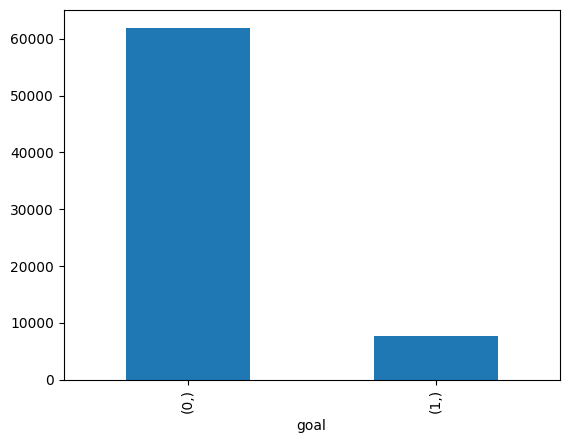

In [ ]:
# see imblance in data 
y_train.value_counts().plot.bar()

In [6]:
df.columns

Index(['x', 'y', 'distance', 'angle', 'defenders_position_x',
       'defenders_position_y', 'gk_pos_x', 'gk_pos_y', 'goal'],
      dtype='object')

### Random Oversapling

In [7]:
from imblearn.over_sampling import RandomOverSampler

o_smpl = RandomOverSampler(random_state = 42) 

X_o_smpl, y_o_smpl = o_smpl.fit_resample(X_train,y_train)


<Axes: xlabel='goal'>

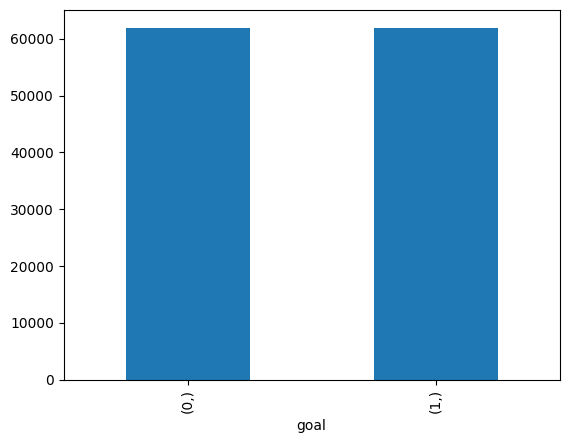

In [8]:
y_o_smpl.value_counts().plot.bar()

### Random undersampling

In [9]:
from imblearn.under_sampling import RandomUnderSampler

u_smpl = RandomUnderSampler(random_state = 42) 

X_u_smpl, y_u_smpl = u_smpl.fit_resample(X_train,y_train)


<Axes: xlabel='goal'>

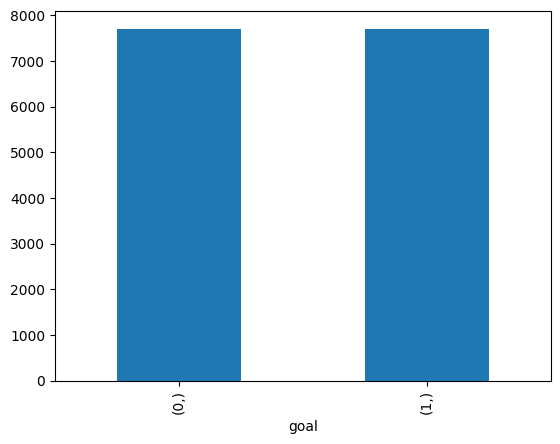

In [10]:
#note how many less total rows we have now 
y_u_smpl.value_counts().plot.bar()

### SMOTE

In [11]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 42) 

X_smote, y_smote = smote.fit_resample(X_train,y_train)

<Axes: xlabel='goal'>

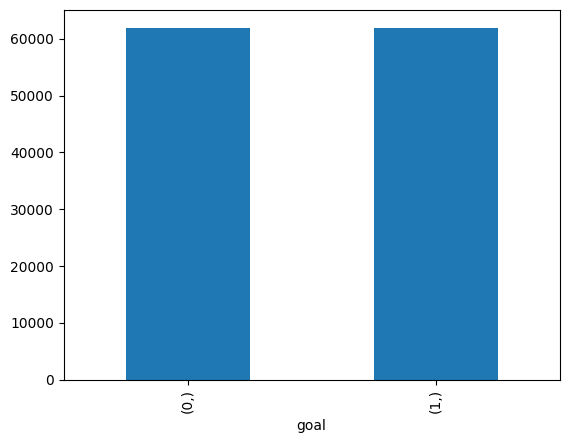

In [12]:
y_smote.value_counts().plot.bar()

### Borderline SMOTE

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

bsmote = BorderlineSMOTE(random_state = 42) 

X_bsmote, y_bsmote = bsmote.fit_resample(X_train,y_train)

<Axes: xlabel='goal'>

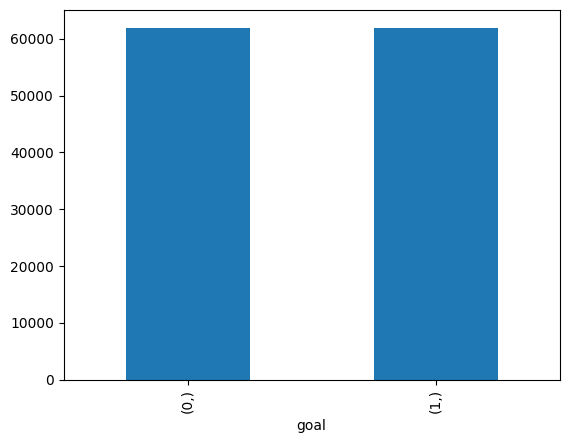

In [14]:
y_bsmote.value_counts().plot.bar()

### Adaptive SMOTE

In [15]:
from imblearn.over_sampling import ADASYN 
adasyn = ADASYN(random_state = 42) 

X_ada, y_ada = adasyn.fit_resample(X_train,y_train)

<Axes: xlabel='goal'>

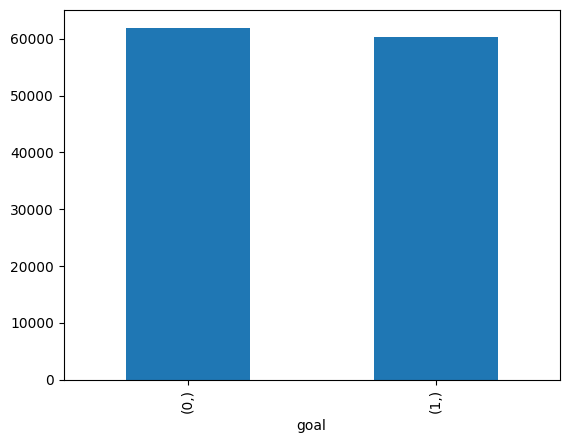

In [16]:
y_ada.value_counts().plot.bar()

### Comparison

In [ ]:
#let's explore a few variables across these 4 different oversampling techniques across two variables 'distanc ' and 'angle'

print('distance differences:')
for i in [X_o_smpl, X_smote, X_bsmote, X_ada]:
    print(i.mean()['distance'])

print('angle differences:')
for i in [X_o_smpl, X_smote, X_bsmote, X_ada]:
    print(i.mean()['angle'])
    
# there is difference between the sampling techniques

distance differences:
16.465065418604343
16.442233419375853
15.920760897677159
16.81938678057553
angle differences:
0.5466715688606655
0.5476679109832632
0.5646147532805688
0.5262155603850217


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#oversampling model 
clf_os = RandomForestClassifier(random_state=0)
clf_os.fit(X_o_smpl, y_o_smpl)
os_pred = clf_os.predict(X_test)

#undersampling model 
clf_us = RandomForestClassifier(random_state=0)
clf_us.fit(X_u_smpl, y_u_smpl)
us_pred = clf_us.predict(X_test)

#SMOTE 
clf_sm = RandomForestClassifier(random_state=0)
clf_sm.fit(X_smote, y_smote)
sm_pred = clf_sm.predict(X_test)

#borderline SMOTE 
clf_bsm = RandomForestClassifier(random_state=0)
clf_bsm.fit(X_bsmote, y_bsmote)
bsm_pred = clf_bsm.predict(X_test)

#ADDASYN
clf_ada = RandomForestClassifier(random_state=0)
clf_ada.fit(X_ada, y_ada)
ada_pred = clf_ada.predict(X_test)

print('Oversampling Score: %.3f' % accuracy_score(y_test,os_pred))
print('Undersampling Score: %.3f' % accuracy_score(y_test,us_pred))
print('SMOTE Score: %.3f '% accuracy_score(y_test,sm_pred))
print('Borderline SMOTE Score: %.3f'% accuracy_score(y_test,bsm_pred))
print('ADASYN Score: %.3f'% accuracy_score(y_test,ada_pred))

c:\Users\dalig\miniconda3\envs\course_vm\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dalig\miniconda3\envs\course_vm\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dalig\miniconda3\envs\course_vm\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\dalig\miniconda3\envs\course_vm\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

Oversampling Score: 0.892
Undersampling Score: 0.704
SMOTE Score: 0.832 
Borderline SMOTE Score: 0.830
ADASYN Score: 0.821


In [19]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
pred = clf_ada.predict(X_test)
print('No Change Score: %.3f'% accuracy_score(y_test,pred))

c:\Users\dalig\miniconda3\envs\course_vm\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


No Change Score: 0.821


### Fine tuning SMOTE

In [20]:
# Testing on 1ß iterations of K
for i in range(1,10,1):
    smote = SMOTE(k_neighbors = i, random_state=42) 

    X_smote, y_smote = smote.fit_resample(X_train,y_train)

    clf_sm = RandomForestClassifier(random_state=0)
    clf_sm.fit(X_smote, y_smote.values.ravel())
    sm_pred = clf_sm.predict(X_test)
    print('K = ' +str(i))
    print('SMOTE Score: %.3f '% accuracy_score(y_test,sm_pred))
    

K = 1
SMOTE Score: 0.865 
K = 2
SMOTE Score: 0.849 
K = 3
SMOTE Score: 0.844 
K = 4
SMOTE Score: 0.836 
K = 5
SMOTE Score: 0.832 
K = 6
SMOTE Score: 0.825 
K = 7
SMOTE Score: 0.824 
K = 8
SMOTE Score: 0.823 
K = 9
SMOTE Score: 0.820 


-> Random oversamling gives the best result yet SMOTE is the best for this type of datasets

In [44]:
X_smote.head()
y_smote.head()

,goal
0,0
1,0
2,1
3,0
4,0


In [52]:
X_resampled_df = pd.DataFrame(X_smote, columns=X.columns)


y_resampled_df = pd.DataFrame(y_smote, columns=['goal'])


df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

df_resampled['goal'].isnull().value_counts()

goal
False    123952
Name: count, dtype: int64

In [50]:
df_resampled.to_csv('resampled_dataset.csv', index=False)

### EDA

                   x              y       distance          angle  \
count  123952.000000  123952.000000  123952.000000  123952.000000   
mean      105.873449      39.792196      16.438521       0.547744   
std         8.181331       8.654868       8.463775       0.346985   
min        30.200000       0.300000       0.400000      -0.002577   
25%       100.800000      34.273042      10.089599       0.298617   
50%       108.000000      40.000000      14.596178       0.439685   
75%       112.100000      45.200000      22.241698       0.674180   
max       120.500000      79.600000      92.800862       3.141593   

       defenders_position_x  defenders_position_y       gk_pos_x  \
count         123952.000000         123952.000000  123952.000000   
mean             101.395466             38.017366     106.479491   
std               23.768884             10.080176       9.716672   
min                0.000000              0.000000      20.400000   
25%              102.800000           

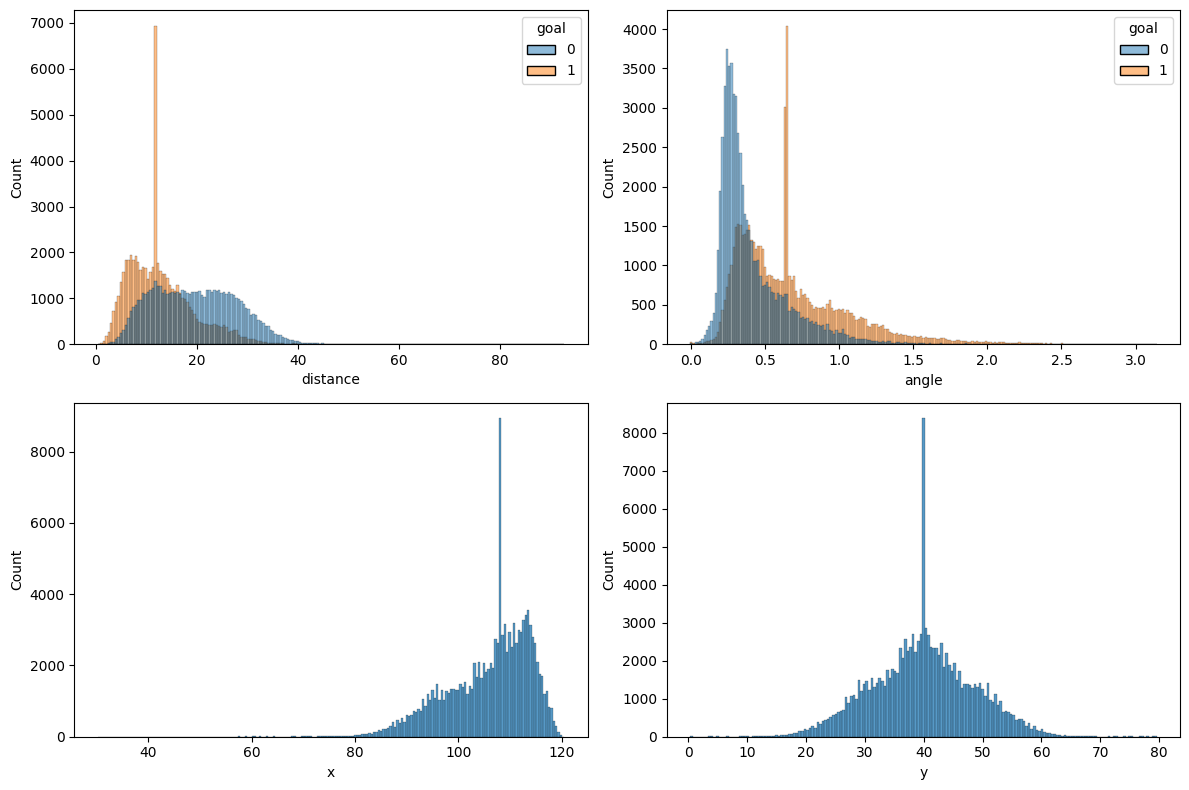

In [54]:
# Basic statistics for all numerical columns
print(df_resampled.describe())

# Distribution of shots that resulted in goals vs non-goals
print(df_resampled['goal'].value_counts(normalize=True) * 100)

# Histograms for key numerical features
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(data=df_resampled, x='distance', hue='goal', ax=axes[0,0])
sns.histplot(data=df_resampled, x='angle', hue='goal', ax=axes[0,1])
sns.histplot(data=df_resampled, x='x', ax=axes[1,0])
sns.histplot(data=df_resampled, x='y', ax=axes[1,1])
plt.tight_layout()
plt.show()

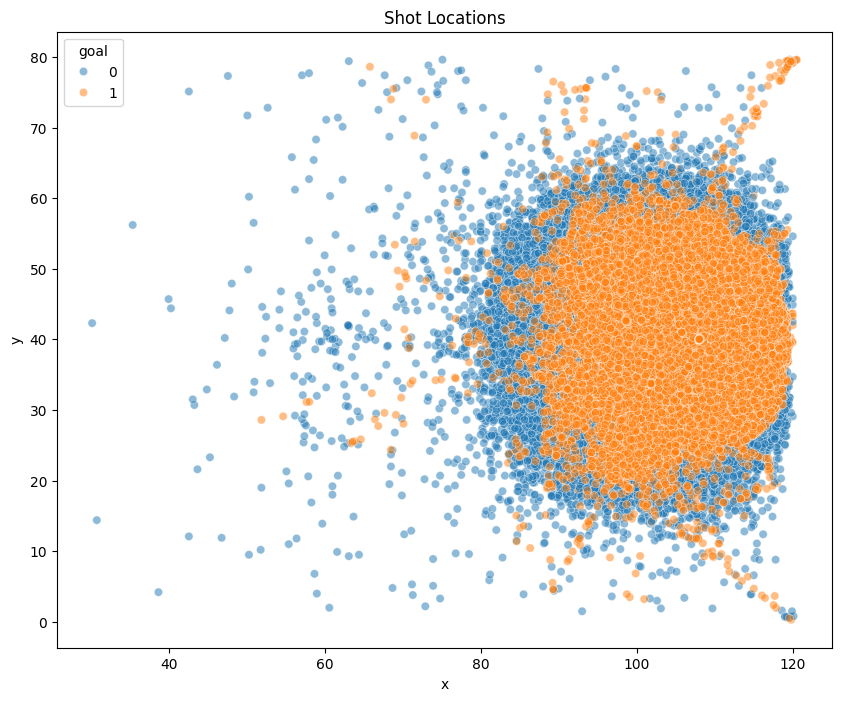

C:\Users\dalig\AppData\Local\Temp\ipykernel_17452\3449430252.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_success = df.groupby('distance_bins')['goal'].mean()


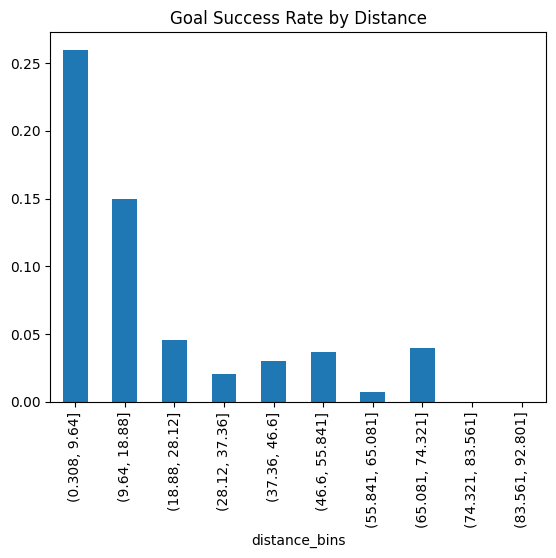

In [58]:
# Scatter plot of shot locations colored by success
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_resampled, x='x', y='y', hue='goal', alpha=0.5)
plt.title('Shot Locations')
plt.show()

# Success rate by distance bins
df_resampled['distance_bins'] = pd.cut(df['distance'], bins=10)
distance_success = df.groupby('distance_bins')['goal'].mean()
distance_success.plot(kind='bar')
plt.title('Goal Success Rate by Distance')
plt.show()

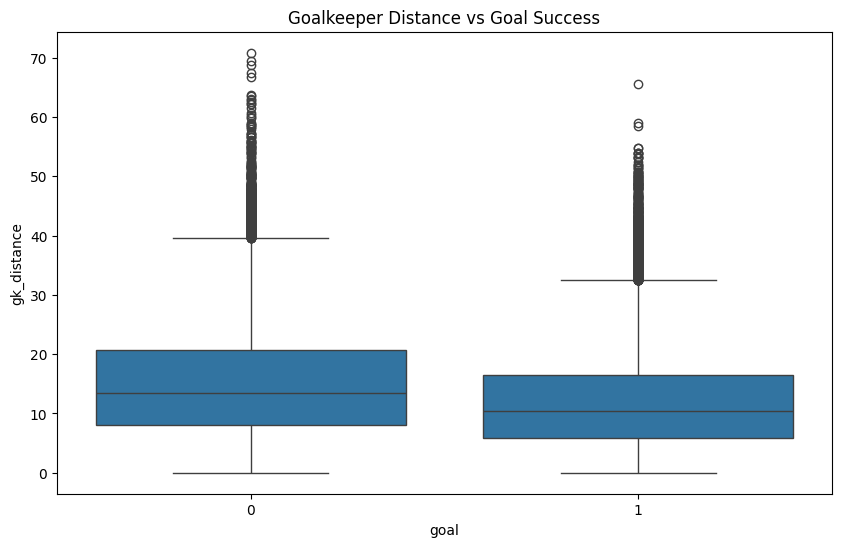

In [59]:
import numpy as np

# Distance between shooter and goalkeeper
df_resampled['gk_distance'] = np.sqrt((df_resampled['x'] - df_resampled['gk_pos_x'])**2 + 
                           (df_resampled['y'] - df_resampled['gk_pos_y'])**2)

# Analyze goalkeeper position impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='goal', y='gk_distance', data=df_resampled)
plt.title('Goalkeeper Distance vs Goal Success')
plt.show()

# Defender position analysis
df['defender_distance'] = np.sqrt((df_resampled['x'] - df_resampled['defenders_position_x'])**2 + 
                                 (df_resampled['y'] - df_resampled['defenders_position_y'])**2)

x                        float64
y                        float64
distance                 float64
angle                    float64
defenders_position_x     float64
defenders_position_y     float64
gk_pos_x                 float64
gk_pos_y                 float64
goal                       int64
distance_bins           category
gk_distance              float64
shot_cluster               int32
dtype: object


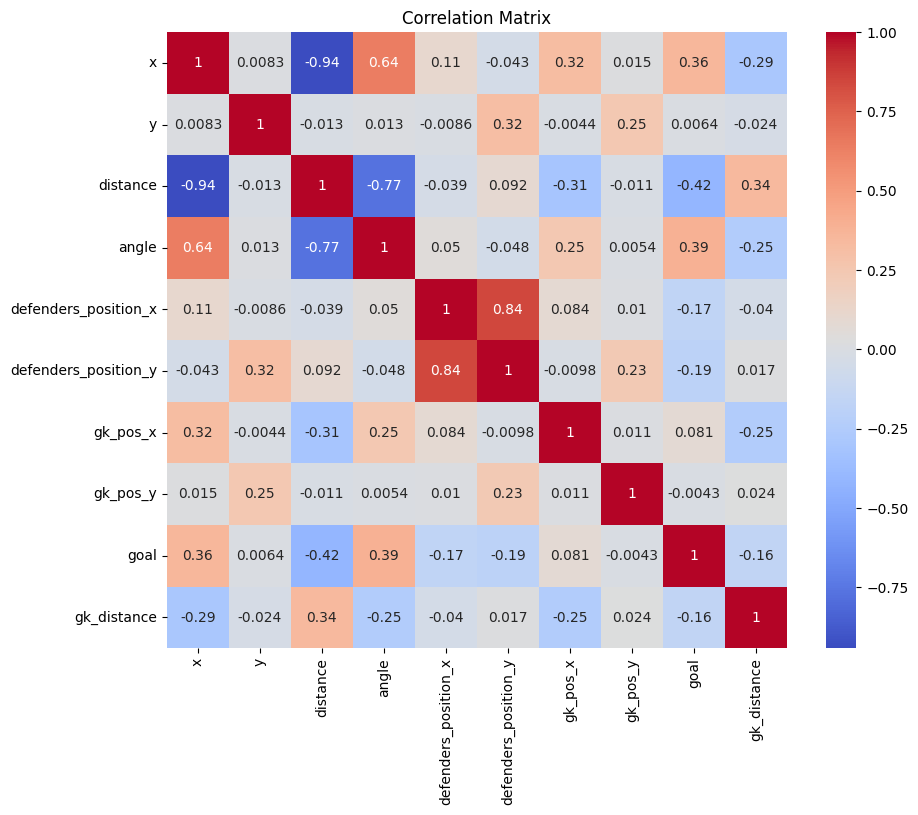

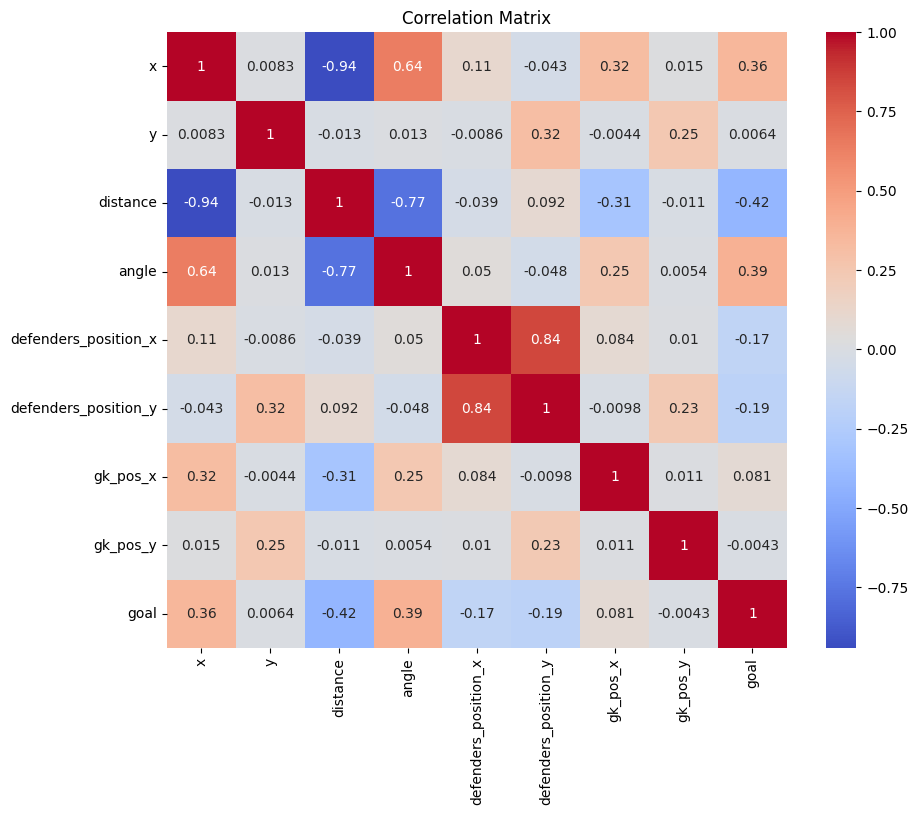

In [66]:
# First, let's see your column types
print(df_resampled.dtypes)

# Create correlation heatmap with only numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# Remove any non-numeric columns
numeric_df = df_resampled.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# If you created any categorical or interval columns earlier (like distance_bins), 
# make sure to exclude them:
columns_to_correlate = ['x', 'y', 'distance', 'angle', 
                       'defenders_position_x', 'defenders_position_y',
                       'gk_pos_x', 'gk_pos_y', 'goal']
correlation_matrix = df_resampled[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\dalig\AppData\Local\Temp\ipykernel_17452\789971869.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_resampled.pivot_table(values='goal',


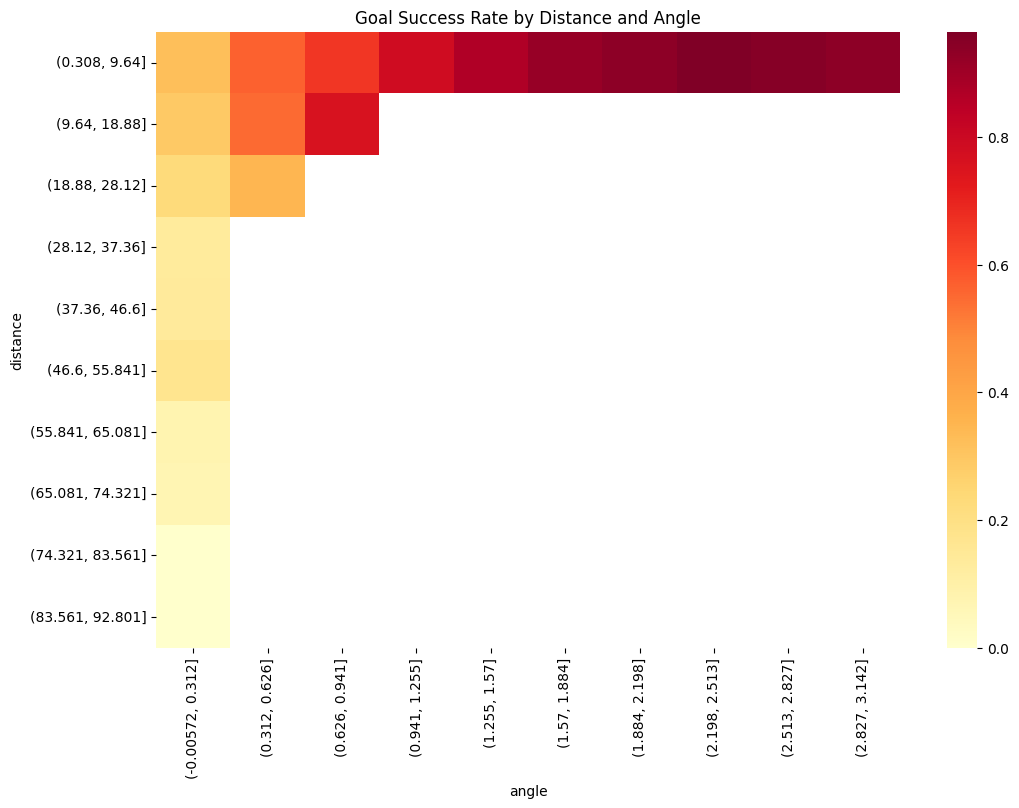

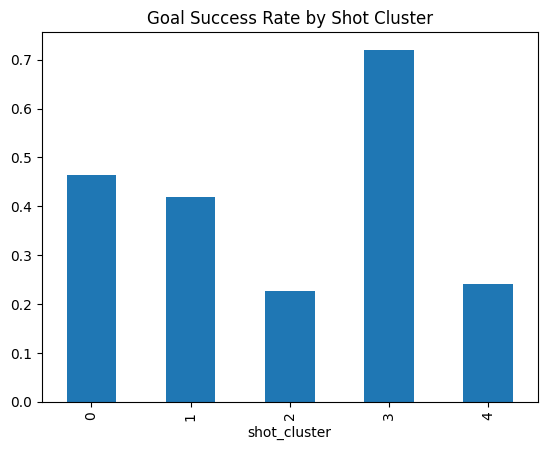

In [63]:
# Success rate by angle and distance combinations
plt.figure(figsize=(12, 8))
pivot_table = df_resampled.pivot_table(values='goal', 
                            index=pd.cut(df_resampled['distance'], bins=10),
                            columns=pd.cut(df_resampled['angle'], bins=10),
                            aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Goal Success Rate by Distance and Angle')
plt.show()

# Shot clustering
from sklearn.cluster import KMeans
X_cluster = df_resampled[['x', 'y']]
kmeans = KMeans(n_clusters=5, random_state=42)
df_resampled['shot_cluster'] = kmeans.fit_predict(X_cluster)

# Success rate by cluster
cluster_success = df_resampled.groupby('shot_cluster')['goal'].mean()
cluster_success.plot(kind='bar')
plt.title('Goal Success Rate by Shot Cluster')
plt.show()

In [92]:
df_resampled.head()

,x,y,distance,angle,defenders_position_x,defenders_position_y,gk_pos_x,gk_pos_y,goal,gk_distance,"distance_bins_(9.64, 18.88]","distance_bins_(18.88, 28.12]","distance_bins_(28.12, 37.36]","distance_bins_(37.36, 46.6]"
0,114.3,38.9,5.805170,1.200540,113.710,35.5500,109.8,35.8,0,5.464430,True,False,False,False
1,93.7,50.8,28.431145,0.259556,101.475,43.8125,102.7,63.9,0,15.893709,True,False,False,False
2,95.7,37.2,24.460785,0.322199,100.720,40.8200,113.3,39.4,1,17.736967,False,True,False,False
3,106.3,33.3,15.250574,0.468475,112.380,42.0800,112.1,36.2,0,6.484597,True,False,False,False
4,101.2,26.9,22.913970,0.287279,105.850,40.2875,118.2,38.2,0,20.412986,False,True,False,False


In [67]:
from scipy import stats

# T-test for distance between successful and unsuccessful shots
goals = df_resampled[df_resampled['goal']==1]['distance']
no_goals = df_resampled[df_resampled['goal']==0]['distance']
t_stat, p_value = stats.ttest_ind(goals, no_goals)
print(f"T-statistic: {t_stat}")
print(f"T-test for distance: p-value = {p_value}")

T-statistic: -162.07698925261676
T-test for distance: p-value = 0.0


there is no differnce between the two groups

In [84]:
# Feature importance visualization
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(df_resampled.drop('goal', axis=1), df_resampled['goal'])
feature_importance = pd.DataFrame({
    'feature': df_resampled.drop('goal', axis=1).columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                           feature  importance
3                            angle    0.143856
2                         distance    0.111535
0                                x    0.096873
4             defenders_position_x    0.085951
5             defenders_position_y    0.078733
6                         gk_pos_x    0.070717
11    distance_bins_(18.88, 28.12]    0.070404
1                                y    0.069650
10     distance_bins_(9.64, 18.88]    0.069176
8                      gk_distance    0.068727
7                         gk_pos_y    0.068558
12    distance_bins_(28.12, 37.36]    0.041866
9                     shot_cluster    0.017562
13     distance_bins_(37.36, 46.6]    0.004848
14    distance_bins_(46.6, 55.841]    0.000646
15  distance_bins_(55.841, 65.081]    0.000637
16  distance_bins_(65.081, 74.321]    0.000162
17  distance_bins_(74.321, 83.561]    0.000067
18  distance_bins_(83.561, 92.801]    0.000032


In [85]:
# Dropping low-importance bins
low_importance_bins = [
    'distance_bins_(46.6, 55.841]', 'distance_bins_(55.841, 65.081]',
    'distance_bins_(65.081, 74.321]', 'distance_bins_(74.321, 83.561]',
    'distance_bins_(83.561, 92.801]'
]
df_resampled = df_resampled.drop(columns=low_importance_bins)

# Dropping other low-importance features (if necessary)
df_resampled = df_resampled.drop(columns=['shot_cluster'], errors='ignore')  # Drop 'shot_cluster' if it's low-value

# Prepare training data
X = df_resampled.drop('goal', axis=1)  # Replace 'goal' with your target column
y = df_resampled['goal']

# Train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nUpdated Feature Importance:")
print(feature_importance)


Updated Feature Importance:
                         feature  importance
3                          angle    0.145174
2                       distance    0.121975
0                              x    0.099931
4           defenders_position_x    0.086680
5           defenders_position_y    0.080820
6                       gk_pos_x    0.071608
9    distance_bins_(9.64, 18.88]    0.070346
1                              y    0.069908
10  distance_bins_(18.88, 28.12]    0.069399
8                    gk_distance    0.069227
7                       gk_pos_y    0.068780
11  distance_bins_(28.12, 37.36]    0.041179
12   distance_bins_(37.36, 46.6]    0.004973


In [91]:
# Export the new dataset to a CSV file
output_file = "updated_dataset.csv"
df_resampled.to_csv(output_file, index=False)

print(f"Updated dataset saved to {output_file}")


Updated dataset saved to updated_dataset.csv
